
1. **Data Loading:**
   Read the Biomass_History.csv and Distance_Matrix.csv files to load the historical biomass availability and travel distance data into Python.


In [6]:
import pandas as pd

# Load Biomass_History.csv
biomass_history = pd.read_csv("../data/Biomass_History.csv")

# Load Distance_Matrix.csv
distance_matrix = pd.read_csv("../data/Distance_Matrix.csv")


2. **Data Preprocessing:**
   Processing the data to handle missing values and organize it for further analysis.


In [7]:
import pandas as pd

# List of columns to be combined (2010 to 2017)
columns_to_combine = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

# Melt the DataFrame to combine the columns into a single column while retaining the year information
biomass_data = pd.melt(biomass_history, id_vars=['Index', 'Longitude', 'Latitude'], value_vars=columns_to_combine, var_name='Year', value_name='Value')

# Display the updated DataFrame
print(biomass_data)



       Index  Longitude  Latitude  Year      Value
0          0   71.33144  24.66818  2010   8.475744
1          1   71.41106  24.66818  2010  24.029778
2          2   71.49069  24.66818  2010  44.831635
3          3   71.57031  24.66818  2010  59.974419
4          4   71.64994  24.66818  2010  14.653370
...      ...        ...       ...   ...        ...
19339   2413   72.84432  20.15456  2017   5.321604
19340   2414   72.92394  20.15456  2017   0.120626
19341   2415   73.00357  20.15456  2017   0.038879
19342   2416   73.08319  20.15456  2017   1.304297
19343   2417   73.16282  20.15456  2017   0.226953

[19344 rows x 5 columns]


In [8]:
distance_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Columns: 2419 entries, Unnamed: 0 to 2417
dtypes: float64(2418), int64(1)
memory usage: 44.6 MB


3. **Biomass Forecasting: Using Linear Regression**
   Use time-series forecasting methods like ARIMA or Prophet to predict biomass availability for the years 2018 and 2019.


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_3417/2768668111.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_data = output_data.append({"Index": source_index, "year": years_to_predict,
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_3417/2768668111.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_data = output_data.append({"Index": source_index, "year": years_to_predict,
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have vali

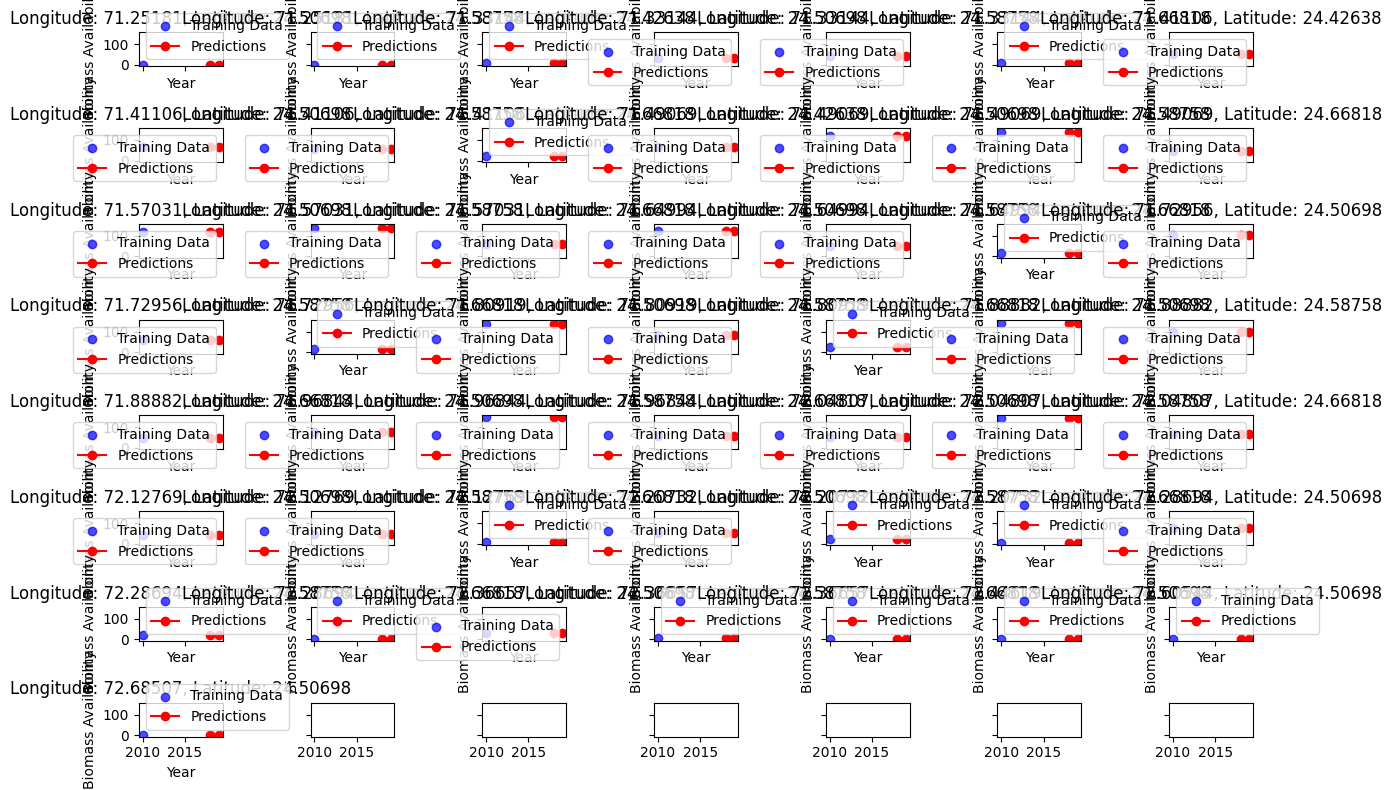

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Assuming 'biomass_data' contains columns: 'Year', 'Longitude', 'Latitude', and 'Value'
# Convert the 'Year' column to numeric
biomass_data['Year'] = pd.to_numeric(biomass_data['Year'])

# Limit the data to only the first 500 rows (index 0 to 499)
biomass_data = biomass_data.iloc[0:50]
# Group the data by 'Longitude' and 'Latitude'
groups = biomass_data.groupby(['Longitude', 'Latitude'])

# Determine the number of subplots based on the number of groups
num_subplots = len(groups)

# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(np.sqrt(num_subplots)))
num_cols = int(np.ceil(num_subplots / num_rows))

# Create a new figure for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the axs array if there is only one row or one column
if num_rows == 1 or num_cols == 1:
    axs = np.ravel(axs)
else:
    axs = axs.ravel()

# Prepare the output DataFrame and save to submission.csv
header = ["Index", "year", "data_type", "source_index", "destination_index", "value"]
output_data = pd.DataFrame(columns=header)

# Iterate through each group, train the model, and make predictions
for idx, (group_name, group_data) in enumerate(groups):
    longitude, latitude = group_name
    train_data = group_data[group_data['Year'] <= 2017]
    test_data = group_data[group_data['Year'] >= 2018]

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(train_data[['Year']], train_data['Value'])

    # Predict biomass availability for the years 2018 and 2019
    years_to_predict = [2018, 2019]
    predictions = model.predict(np.array(years_to_predict).reshape(-1, 1))

    # Plot the training data for this group
    axs[idx].scatter(train_data['Year'], train_data['Value'], label='Training Data', color='blue', alpha=0.7)

    # Plot the predicted values for this group
    axs[idx].plot(years_to_predict, predictions, label='Predictions', color='red', marker='o')

    # Set title and labels for each subplot
    axs[idx].set_title(f'Longitude: {longitude}, Latitude: {latitude}')
    axs[idx].set_xlabel('Year')
    axs[idx].set_ylabel('Biomass Availability')
    axs[idx].legend()

    # Save predictions to prediction.csv
    source_index = group_data.index.values[0]
    output_data = output_data.append({"Index": source_index, "year": years_to_predict, 
                                      "data_type": "biomass_forecast", "source_index": source_index, 
                                      "destination_index": '', "value": predictions}, ignore_index=True)

# Save the output to submission.csv with header
output_data.to_csv('submission.csv', index=False)
# You can use `mode='a'` if you want to append to the existing file.
# output_data.to_csv('submission.csv', index=False, mode='a', header=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


4. **Optimal Asset Locations:**
   Implement an optimization algorithm (e.g., Genetic Algorithm, Simulated Annealing, or Linear Programming) to find the optimal locations for preprocessing depots and biorefineries based on the forecasted biomass data and distance matrix.


In [10]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Read the distance matrix from the CSV file
distance_matrix = pd.read_csv("../data/Distance_Matrix.csv", index_col=0)

# Filter the data for years 2018 and 2019
biomass_data = biomass_data[biomass_data["Year"].isin([2018, 2019])]

# Load the biomass predictions for years 2018 and 2019 from the previous code
biomass_predictions = pd.read_csv("prediction.csv")

# Rename the 'Index' column in biomass_data to match the name in biomass_predictions
biomass_data.rename(columns={"ID": "Index"}, inplace=True)

# Merge biomass predictions with distance_matrix based on 'Index'
biomass_data = pd.merge(biomass_data, biomass_predictions, on='Index', how='left', suffixes=('_original', '_predicted'))

# Reset the index of biomass_data
biomass_data.reset_index(drop=True, inplace=True)
print(biomass_data.head)

# Create a list of source indices
source_indices = biomass_data["Index"].tolist()

# Create a list of biorefinery and depot indices
biorefinery_indices = [0, 1, 2]  # Example: Assuming 3 biorefineries
depot_indices = [30, 31, 32]       # Example: Assuming 3 depots

# Create the LP problem
prob = LpProblem(name="Optimal_Asset_Locations", sense=LpMaximize)

# Create binary variables for each source, depot, and biorefinery
sources = LpVariable.dicts("Source", source_indices, cat="Binary")
depots = LpVariable.dicts("Depot", depot_indices, cat="Binary")
biorefineries = LpVariable.dicts("Biorefinery", biorefinery_indices, cat="Binary")

# Objective function: Maximize the total biomass collected
prob += lpSum([biomass_data.loc[biomass_data["Index"] == i, "Predicted_Value"].values[0] * sources[i] for i in source_indices])

# Constraints: Each source must be assigned to one depot or one biorefinery
for i in source_indices:
    prob += lpSum([sources[i], lpSum([distance_matrix.at[i, j] * depots[j].varValue for j in depot_indices]), 
                   lpSum([distance_matrix.at[i, k] * biorefineries[k].varValue for k in biorefinery_indices])]) == 1

# Constraints: Total number of depots and biorefineries should be limited
prob += lpSum([depots[j].varValue for j in depot_indices]) <= 2  # Example: Maximum 2 depots allowed
prob += lpSum([biorefineries[k].varValue for k in biorefinery_indices]) <= 1 # Example: Maximum 1 biorefinery allowed

# Constraints: Ensure that only one asset is assigned per location
for i in depot_indices + biorefinery_indices:
    prob += lpSum([depots[j].varValue for j in depot_indices]) + lpSum([biorefineries[k].varValue for k in biorefinery_indices]) <= 1

# Solve the LP problem
prob.solve()

# Print the status of the optimization
print("Status:", prob.status)

# Extract the optimal assignment
optimal_sources = [i for i in source_indices if sources[i].varValue == 1]
optimal_depots = [j for j in depot_indices if depots[j].varValue == 1]
optimal_biorefineries = [k for k in biorefinery_indices if biorefineries[k].varValue == 1]

print("Optimal Sources:", optimal_sources)
print("Optimal Depots:", optimal_depots)
print("Optimal Biorefineries:", optimal_biorefineries)

# Prepare the output data in the desired format
output_data = pd.DataFrame(columns=["year", "data_type", "source_index", "destination_index", "value"])

# Assign sources to depots
for source in optimal_sources:
    nearest_depot = min(optimal_depots, key=lambda depot: distance_matrix.at[source, depot])
    output_data = output_data.append({"year": 2018, "data_type": "depot_location", 
                                      "source_index": source, "destination_index": nearest_depot, 
                                      "value": ""}, ignore_index=True)

# Assign sources to biorefineries
for source in optimal_sources:
    nearest_biorefinery = min(optimal_biorefineries, key=lambda biorefinery: distance_matrix.at[source, biorefinery])
    output_data = output_data.append({"year": 2018, "data_type": "refinery_location", 
                                      "source_index": source, "destination_index": nearest_biorefinery, 
                                      "value": ""}, ignore_index=True)

# Save the output to test_submission.csv
output_data.to_csv("sample_submission.csv", index=False)


<bound method NDFrame.head of Empty DataFrame
Columns: [Longitude, Latitude, Year, Value, Index, year, data_type, source_index, destination_index, value]
Index: []>
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/codespace/.python/current/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/8ee199eee0b642748190b90345d57b7f-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/8ee199eee0b642748190b90345d57b7f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 15 RHS
At line 24 BOUNDS
At line 26 ENDATA
Problem MODEL has 8 rows, 1 columns and 0 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Empty problem - 8 rows, 1 columns and 0 elements
Optimal - objective value 0
Optimal objective 0 - 0 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seco

/tmp/ipykernel_3417/990101306.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biomass_data.rename(columns={"ID": "Index"}, inplace=True)


5. **Submission:**
   Prepare the output in the desired format and save it to the sample_submission.csv file.
